In [1]:
# Import the dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
# Import the API key
from config import weather_api_key

In [2]:
# In the next cell, we'll add the code that generates the latitudes and longitudes, but first, they need 
# to be stored so that we can access them later. Since we are creating arrays of latitudes and longitudes, 
# we'll declare each array as a variable.

In [3]:
# Create a set of random latitude and longitude combinations.
# To ensure enough latitudes and longitudes, we'll start with 1,500.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats,lngs)
lat_lngs

In [4]:
# When we run this cell, the output is a zip object in memory. The zip object packs each pair of lats and lngs having the 
# same index in their respective array into a tuple. If there are 1,500 latitudes and longitudes, there will be 
# 1,500 tuples of paired latitudes and longitudes, where each latitude and longitude in a tuple can be accessed by 
# the index of 0 and 1, respectively.

In [5]:
# Next, let's unpack our lat_lngs zip object into a list. 
# This way, we only need to create a set of random latitudes and longitudes once.

In [6]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [7]:
# NOTE: You can only unzip a zipped tuple once before it is removed from the computer's memory. 
# Make sure you unzip the latitudes and longitudes into the coordinates list before moving on.

In [8]:
# Now that we have our ordered pairs of latitudes and longitudes in a list, we can iterate 
# through the list of tuples and find the nearest city to those coordinates.

In [9]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [10]:
# Next, use the five pairs of latitudes and longitudes we used from our zip practice to get a city and country code 
# from the citipy module. In a new cell, create a for loop that will do the following:
# Iterate through the coordinates' zipped tuple.
# Use citipy.nearest_city() and inside the parentheses of nearest_city(), add the latitude and longitude in this format: 
# coordinate[0], coordinate[1].
# To print the city name, chain the city_name to the nearest_city() function.
# To print the country name, chain the country_code to the nearest_city() function.

In [11]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

622

In [12]:
# We create a cities list to store city names.
# We iterate through the coordinates, as in our practice, and retrieve the nearest city using the latitude 
# and longitude pair.
# We add a decision statement with the logical operator not in to determine whether the found city is already in the cities 
# list. If not, then we'll use the append() function to add it. We are doing this because among the 1,500 
# latitudes and longitudes, there might be duplicates, which will retrieve duplicate cities, and we want 
# to be sure we capture only the unique cities.

In [13]:
# Finding: When you run the code block, you should get slightly more than 500 unique cities. If you get fewer than 500, 
# increase your size limit on the np.random.uniform() function.

In [14]:
# Let's use pseudocode to map out, at a high level, how we will get the weather data for each city for the website.
# We will need to do the following:
# Import our dependencies and initialize counters and an empty list that will hold the weather data.
# Loop through the cities list.
# Group the cities in sets of 50 to log the process as we find the weather data for each city.
# Two counters will be needed here: one to log the city count from 1 to 50, and another for the sets.
# Build the city_url or endpoint for each city.
# Log the URL and the record and set numbers.
# Make an API request for each city.
# Parse the JSON weather data for the following:
# City, country, and date
# Latitude and longitude
# Maximum temperature
# Humidity
# Cloudiness
# Wind speed
# Add the data to a list in a dictionary format and then convert the list to a DataFrame.

In [15]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=336e9f6e911a9e2f02ea5454a07ad2de


In [16]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [17]:
# Create an empty list to hold the weather data.
city_data = []

In [18]:
# Print the beginning of the logging.
print('Beginning Data Retrieval     ')
print('-----------------------------')

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [19]:
# In the code block, we have initialized the counters at 1 because we want the first iteration 
# of the logging for each recorded response and the set to start at 1.

In [20]:
# Next, we need to iterate through our list of cities and begin building the URL for each city, while grouping our records 
# in sets of 50. To do this, use for i in range(len(cities)) and the index to tell us when we get to 50. 
# We can also retrieve the city from the cities list and add it to the city_url by using indexing

In [21]:
# Loop through all the cities in our list.
# for i in range(len(cities)):
    
#     # Group cities in sets of 50 for logging purposes.
#     if (i % 50 == 0 and i >= 50):
#         set_count += 1
#         record_count = 1
#     # Create endpoint URL with each city.
#     city_url = url + '&q=' + cities[i]
    
# Every time we want to reference the city in our code, we need to use the indexing on the cities list. Unfortunately, 
# this will cause programming errors when we are building the city_url because it adds the index, not the city name, 
# to the city_url. To fix this issue, we need to create another for loop to get the city from the cities list. Instead of 
# using two for loops, we can use the enumerate() method as an alternative way to iterate through the list of 
# cities and retrieve both the index, and the city from the list.

# Loop through all the cities in the list.
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + '&q=' + city.replace(' ', '+')
    
    # Log the URL, record, and set numbers and the city.
    print(f'Processing Record {record_count} of Set {set_count} | {city}')
    # Add 1 to the record count.
    record_count += 1
# We create the for loop with the enumerate() method and reference the index and the city in the list.
# In the conditional statement, we check if the remainder of the index divided by 50 is equal to 0 and if the index 
#     is greater than or equal to 50. If the statement is true, then the set_count and the record_count are incremented by 1.
# Inside the conditional statement, we create the URL endpoint for each city, as before. However, we are removing the 
#     blank spaces in the city name and concatenating the city name with, city.replace(" ","+"). This will find the 
#     corresponding weather data for the city instead of finding the weather data for the first part of the city name.
# Compare the URLs for Cabo (Links to an external site.) and Cabo San Lucas (Links to an external site.).
# Also, we add a print statement that tells us the record count and set count, and the city that is being processed.
# Then we add one to the record count before the next city is processed.

Processing Record 1 of Set 1 | thompson
Processing Record 2 of Set 1 | milton
Processing Record 3 of Set 1 | itacoatiara
Processing Record 4 of Set 1 | sisimiut
Processing Record 5 of Set 1 | hami
Processing Record 6 of Set 1 | ushuaia
Processing Record 7 of Set 1 | yellowknife
Processing Record 8 of Set 1 | atuona
Processing Record 9 of Set 1 | chokurdakh
Processing Record 10 of Set 1 | punta arenas
Processing Record 11 of Set 1 | pringsewu
Processing Record 12 of Set 1 | namatanai
Processing Record 13 of Set 1 | sorong
Processing Record 14 of Set 1 | clyde river
Processing Record 15 of Set 1 | aksarka
Processing Record 16 of Set 1 | carnarvon
Processing Record 17 of Set 1 | saskylakh
Processing Record 18 of Set 1 | busselton
Processing Record 19 of Set 1 | cape town
Processing Record 20 of Set 1 | puerto ayora
Processing Record 21 of Set 1 | chuy
Processing Record 22 of Set 1 | bolungarvik
Processing Record 23 of Set 1 | uaua
Processing Record 24 of Set 1 | port blair
Processing Reco

In [22]:
# We'll add a try-except block to our code to prevent the API request from stopping prematurely if the city_weather request 
# isn't a valid response. If the request isn't valid, the code will not find the first item requested, which is the 
# dictionary "coord" with the code city_lat = city_weather["coord"]["lat"], and skip the city and continue to run.

In [23]:
# Print the beginning of the logging.
print('Beginning Data Retrieval     ')
print('-----------------------------')

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + '&q=' + city.replace(' ', '+')
    
    # Log the URL, record, and set numbers and the city.
    print(f'Processing Record {record_count} of Set {set_count} | {city}')
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | thompson
Processing Record 2 of Set 1 | milton
Processing Record 3 of Set 1 | itacoatiara
Processing Record 4 of Set 1 | sisimiut
Processing Record 5 of Set 1 | hami
Processing Record 6 of Set 1 | ushuaia
Processing Record 7 of Set 1 | yellowknife
Processing Record 8 of Set 1 | atuona
Processing Record 9 of Set 1 | chokurdakh
Processing Record 10 of Set 1 | punta arenas
Processing Record 11 of Set 1 | pringsewu
Processing Record 12 of Set 1 | namatanai
Processing Record 13 of Set 1 | sorong
Processing Record 14 of Set 1 | clyde river
Processing Record 15 of Set 1 | aksarka
Processing Record 16 of Set 1 | carnarvon
Processing Record 17 of Set 1 | saskylakh
Processing Record 18 of Set 1 | busselton
Processing Record 19 of Set 1 | cape town
Processing Record 20 of Set 1 | puerto ayora
Processing Record 21 of Set 1 | chuy
Processing Record 22 of Set 1 | bolungarvik
City not found. Skipping...
Process

Processing Record 36 of Set 4 | trairi
Processing Record 37 of Set 4 | barentsburg
City not found. Skipping...
Processing Record 38 of Set 4 | kisangani
Processing Record 39 of Set 4 | gornozavodsk
Processing Record 40 of Set 4 | belushya guba
City not found. Skipping...
Processing Record 41 of Set 4 | kortkeros
Processing Record 42 of Set 4 | krasnoselkup
Processing Record 43 of Set 4 | morehead
Processing Record 44 of Set 4 | tilichiki
Processing Record 45 of Set 4 | avera
Processing Record 46 of Set 4 | qaanaaq
Processing Record 47 of Set 4 | sao filipe
Processing Record 48 of Set 4 | ha giang
Processing Record 49 of Set 4 | ribeira grande
Processing Record 50 of Set 4 | umzimvubu
City not found. Skipping...
Processing Record 1 of Set 5 | bhola
Processing Record 2 of Set 5 | shimoda
Processing Record 3 of Set 5 | hofn
Processing Record 4 of Set 5 | nanortalik
Processing Record 5 of Set 5 | aquiraz
Processing Record 6 of Set 5 | govardhan
Processing Record 7 of Set 5 | portland
Proce

Processing Record 23 of Set 8 | vardo
Processing Record 24 of Set 8 | xuddur
Processing Record 25 of Set 8 | san pedro
Processing Record 26 of Set 8 | flinders
Processing Record 27 of Set 8 | havre-saint-pierre
Processing Record 28 of Set 8 | sabha
Processing Record 29 of Set 8 | tumannyy
City not found. Skipping...
Processing Record 30 of Set 8 | ruyigi
Processing Record 31 of Set 8 | verkhovazhye
Processing Record 32 of Set 8 | moyale
Processing Record 33 of Set 8 | asau
Processing Record 34 of Set 8 | beringovskiy
Processing Record 35 of Set 8 | chicama
Processing Record 36 of Set 8 | joao camara
Processing Record 37 of Set 8 | mlalo
Processing Record 38 of Set 8 | brainerd
Processing Record 39 of Set 8 | izazi
Processing Record 40 of Set 8 | morro bay
Processing Record 41 of Set 8 | boundiali
Processing Record 42 of Set 8 | khasan
Processing Record 43 of Set 8 | grindavik
Processing Record 44 of Set 8 | pokhara
Processing Record 45 of Set 8 | bandarbeyla
Processing Record 46 of Set

Processing Record 15 of Set 12 | leavenworth
Processing Record 16 of Set 12 | gaozhou
Processing Record 17 of Set 12 | sibolga
Processing Record 18 of Set 12 | robertsport
Processing Record 19 of Set 12 | myshkin
Processing Record 20 of Set 12 | washougal
Processing Record 21 of Set 12 | puerto baquerizo moreno
Processing Record 22 of Set 12 | bolgatanga
Processing Record 23 of Set 12 | zemetchino
Processing Record 24 of Set 12 | varhaug
Processing Record 25 of Set 12 | zarichne
Processing Record 26 of Set 12 | cherdakly
Processing Record 27 of Set 12 | quang ngai
Processing Record 28 of Set 12 | san carlos
Processing Record 29 of Set 12 | vangaindrano
Processing Record 30 of Set 12 | pousat
City not found. Skipping...
Processing Record 31 of Set 12 | selfoss
Processing Record 32 of Set 12 | moissac
Processing Record 33 of Set 12 | hamilton
Processing Record 34 of Set 12 | vestbygda
City not found. Skipping...
Processing Record 35 of Set 12 | cobija
Processing Record 36 of Set 12 | wyn

In [24]:
# Our next steps will entail converting the array of dictionaries to a DataFrame, ensuring the columns are in 
# the correct order, and exporting the DataFrame to a comma-separated (CSV) file.
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Thompson,55.7435,-97.8558,-9.40,64,1,10.36,CA,2021-03-23 14:57:33
1,Milton,34.1322,-84.3007,60.01,72,100,5.01,US,2021-03-23 14:57:33
2,Itacoatiara,-3.1431,-58.4442,83.93,72,98,5.14,BR,2021-03-23 14:57:34
3,Sisimiut,66.9395,-53.6735,-2.63,86,93,6.60,GL,2021-03-23 14:57:34
4,Hami,42.8000,93.4500,52.07,25,43,5.21,CN,2021-03-23 14:57:34
5,Ushuaia,-54.8000,-68.3000,46.40,87,90,5.84,AR,2021-03-23 14:56:46
6,Yellowknife,62.4560,-114.3525,-11.00,64,75,9.22,CA,2021-03-23 14:56:51
7,Atuona,-9.8000,-139.0333,80.06,68,7,19.82,PF,2021-03-23 14:57:35
8,Chokurdakh,70.6333,147.9167,-9.98,94,100,13.98,RU,2021-03-23 14:57:35
9,Punta Arenas,-53.1500,-70.9167,50.00,87,40,13.80,CL,2021-03-23 14:57:16


In [25]:
# Next, we'll reorder the columns as City, Country, Date, Lat, Lng, Max Temp, Humidity, Cloudiness, and Wind Speed, 
# so they are easy to read.
# REWIND
# Recall that to reorder the columns, we assign a variable to an array of the columns in the order we want them to appear:
# new_column_order = ["column2", "column4", "column1"]
# Then, we assign a new or the same DataFrame with new column order:
# df = df[new_column_order]

In [26]:
new_column_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Thompson,CA,2021-03-23 14:57:33,55.7435,-97.8558,-9.40,64,1,10.36
1,Milton,US,2021-03-23 14:57:33,34.1322,-84.3007,60.01,72,100,5.01
2,Itacoatiara,BR,2021-03-23 14:57:34,-3.1431,-58.4442,83.93,72,98,5.14
3,Sisimiut,GL,2021-03-23 14:57:34,66.9395,-53.6735,-2.63,86,93,6.60
4,Hami,CN,2021-03-23 14:57:34,42.8000,93.4500,52.07,25,43,5.21
...,...,...,...,...,...,...,...,...,...
563,Dauphin,CA,2021-03-23 15:00:12,51.1494,-100.0502,21.20,93,90,24.16
564,Turan,VN,2021-03-23 15:00:13,16.0678,108.2208,69.80,83,75,2.30
565,Korla,CN,2021-03-23 15:00:13,41.7597,86.1469,54.01,33,100,3.40
566,Kupang,ID,2021-03-23 15:00:13,-10.1667,123.5833,79.59,82,63,4.70


In [27]:
# Create the output file (CSV).
# output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
# city_data_df.to_csv(output_data_file, index_label="City_ID")

In [28]:
# We are going to create a series of scatter plots for each weather parameter against the latitude for all the cities.
# We'll create scatter plots for latitude vs. maximum temperature, humidity, cloudiness, and wind speed.
# First, we'll retrieve the data we need to create our scatter plots. We will need latitude, maximum temperature, 
# humidity, cloudiness, and wind speed from all the cities. 

In [29]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df['Lat']
max_temps = city_data_df['Max Temp']
humidity = city_data_df['Humidity']
cloudiness = city_data_df['Cloudiness']
wind_speed = city_data_df['Wind Speed']

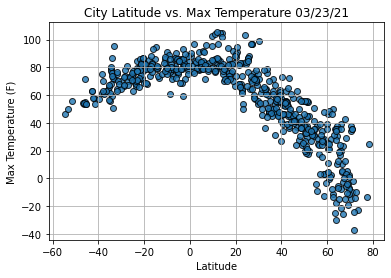

In [30]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

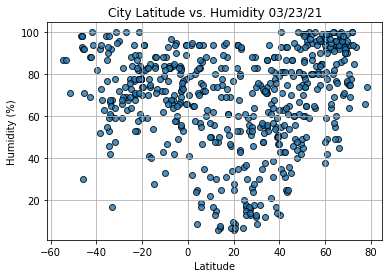

In [31]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

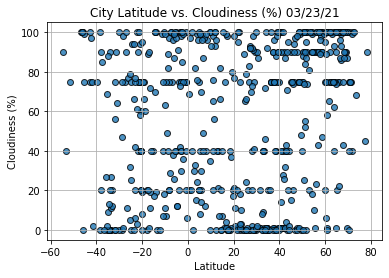

In [32]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

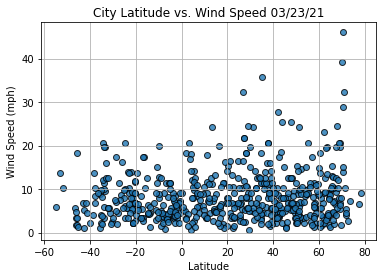

In [33]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [34]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [35]:
index13 = city_data_df.loc[13]
index13

City                  Clyde River
Country                        CA
Date          2021-03-23 14:55:36
Lat                       70.4692
Lng                      -68.5914
Max Temp                    -14.8
Humidity                       64
Cloudiness                     75
Wind Speed                  14.97
Name: 13, dtype: object

In [36]:
# We can also filter a DataFrame based on a value of a row. For instance, if we wanted to get all Northern Hemisphere 
# latitudes, for latitudes greater than or equal to 0, we can filter the city_data_df DataFrame 
# using the code city_data_df["Lat"] >= 0
city_data_df['Lat'] >= 0

0       True
1       True
2      False
3       True
4       True
       ...  
563     True
564     True
565     True
566    False
567    False
Name: Lat, Length: 568, dtype: bool

In [37]:
# If we want to return a DataFrame with all data fitting the criteria, for latitudes greater than or equal to 0, we can use 
# the loc method on the city_data_df DataFrame. Inside the brackets, we would add the 
# conditional filter city_data_df["Lat"] >= 0
city_data_df.loc[(city_data_df['Lat'] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Thompson,CA,2021-03-23 14:57:33,55.7435,-97.8558,-9.40,64,1,10.36
1,Milton,US,2021-03-23 14:57:33,34.1322,-84.3007,60.01,72,100,5.01
3,Sisimiut,GL,2021-03-23 14:57:34,66.9395,-53.6735,-2.63,86,93,6.60
4,Hami,CN,2021-03-23 14:57:34,42.8000,93.4500,52.07,25,43,5.21
6,Yellowknife,CA,2021-03-23 14:56:51,62.4560,-114.3525,-11.00,64,75,9.22


In [38]:
# Now assign this DataFrame to the variable northern_hemi_df to access the data to perform linear regression.
# We can take the same approach to get the cities for the Southern Hemisphere by 
# filtering the city_data_df DataFrame for latitudes less than 0.

In [39]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df['Lat'] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]
# Now we can perform linear regression on latitude and maximum temperature from each hemisphere DataFrame.

In [40]:
# To generate the linear regression on the maximum temperature for the Northern Hemisphere, we'll need x and y values. 
# Set the x values equal to the latitude column and the y values equal to the maximum temperature 
# column from the northern_hemi_df DataFrame.

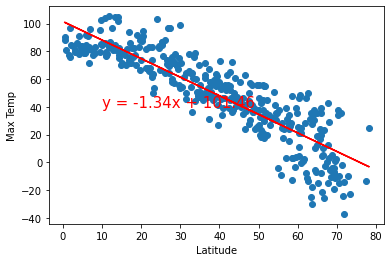

In [41]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']
# Call the function
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Northern Hemisphere \
                      for Maximum Temperature', 'Max Temp',(10,40))

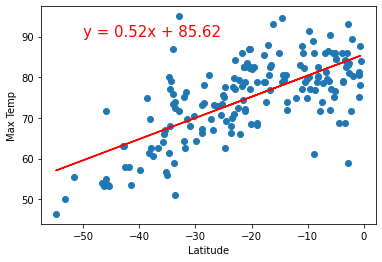

In [42]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']
# Call the function
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Southern Hemisphere \
                      for Maximum Temperature', 'Max Temp',(-50,90))

In [43]:
# Finding: The correlation between the latitude and the maximum temperature is strong to very strong because the r-value 
# is less than –0.7 for the Northern Hemisphere and greater than 0.7 for the Southern Hemisphere, as shown by the plots here. 
# This means that as we approach the equator, 0° latitude, the temperatures become warmer. 
# And when we are further from the equator the temperatures become cooler. Check the r-values for your plots. 

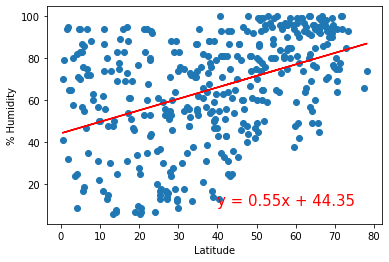

In [44]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
# Call the function
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Northern Hemisphere \
                      for % Humidity', '% Humidity',(40,10))

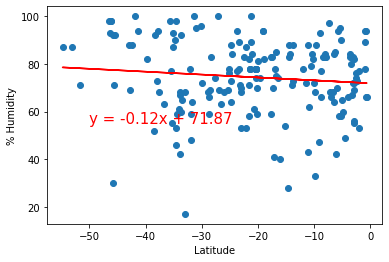

In [45]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
# Call the function
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Southern Hemisphere \
                      for % Humidity', '% Humidity',(-50,55))

In [46]:
# Finding: The correlation between the latitude and percent humidity is very low because the r-value is less than 
#     0.04 for the Northern and Southern Hemispheres for the plots shown here. This means that percent 
#     humidity is unpredictable due to changing weather patterns that can increase or decrease percent humidity. 
#     Check the r-values for your plots. 

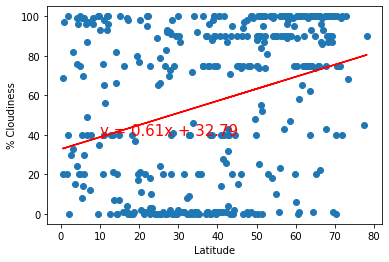

In [47]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
# Call the function
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Northern Hemisphere \
                      for % Cloudiness', '% Cloudiness',(10,40))

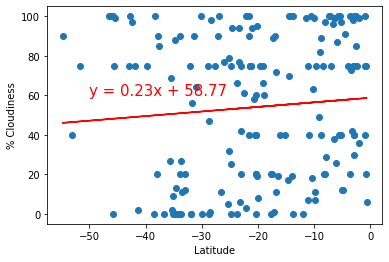

In [48]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

In [49]:
# Finding: The correlation between the latitude and percent cloudiness is very low because the r-value is less than –0.09 
# for the Northern Hemisphere and less than –0.02 for the Southern Hemisphere for the plots shown here.
# This means that cloudiness is unpredictable due to changing weather patterns that can increase or decrease 
# percent cloudiness. Check the r-values for your plots.

In [50]:
# Call the plot_linear_regression function, with the x-value equal to the Latitude column and the y-value equal to 
# the Wind Speed column from the northern_hemi_df DataFrame. Edit the title, y_label, and text_coordinates 
# for the wind speed scatter plot.

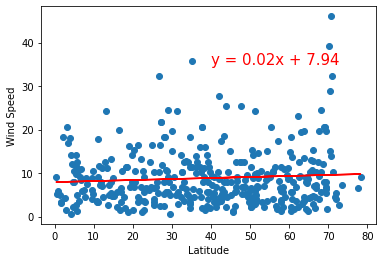

In [51]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']
# Call the function
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Northern Hemisphere \
                      for Wind Speed', 'Wind Speed', (40,35))

In [52]:
# Finally, let's call the plot_linear_regression function, with the x-value equal to the latitude column and 
# the y-value equal to wind speed column from the southern_hemi_df DataFrame. Edit the title, y_label, and 
# text_coordinates for the wind speed scatter plot.

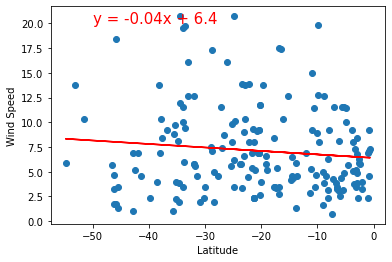

In [53]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']
# Call the function
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Southern Hemisphere \
                      for Wind Speed', 'Wind Speed',(-50,20))

In [54]:
# Finding: The correlation between the latitude and wind speed is very low because the r-value is less  than –0.07 for 
# the Northern Hemisphere and less than –0.3 for the Southern Hemisphere for the plots shown here. This means that wind 
# speed is unpredictable due to changing weather patterns that can increase or decrease wind speed. 
# Check the r-values for your plots. 